# Выгрузка и проверка данных из БД по Яндекс Дзен

---
<a id='contens'></a> 
# Оглавление
1. [Коннекция к БД](#connection)
2. [Описание данных](#data_name)
3. [Изучение и проверка данных](#check)
4. [Экспорт данных в csv](#export)
5. [Дашборд](#dashboard)
6. [Презентация](#presentation)

---
<a id='connection'></a> 
## Коннекция к БД
[Назад к оглавлению](#contens)

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

# задаём параметры подключения к БД
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных


# формируем строку соединения с БД
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])
# подключаемся к БД
engine = create_engine(connection_string)

# формируем sql-запрос.
query = ''' SELECT *
            FROM dash_visits
        ''' 
# выполняем запрос и сохраняем результат
df_raw = pd.io.sql.read_sql(query, con = engine)

---
<a id='data_name'></a> 
## Описание данных
[Назад к оглавлению](#contens)

- record_id — первичный ключ,
- item_topic — тема карточки,
- source_topic — тема источника,
- age_segment — возрастной сегмент,
- dt — дата и время,
- visits — количество событий.

---
<a id='check'></a> 
## Изучение и проверка данных
[Назад к оглавлению](#contens)

In [2]:
# напишем функцию для изучения основных характеристик датафрейма
def df_study(df):
      
    # изучим начало и конец выборки
    display(df.head(10), df.tail(10))

    # изучим информацию о датафрейме
    display(df.info())
    
    # изучим статистические показатели
    display(df.describe())
    
    print('-'*50)
    # изучим количество строк и столбцов
    print('Количество строк и столбцов:', df.shape)   

    print('-'*50)
    # посчитаем количество явных дубликатов
    dubl = df.duplicated().sum()
    print('Количество явных дубликатов:' , dubl)
    
    # посчитаем долю дубликатов
    dubl_share = dubl/len(df)
    print(f'Доля явных дубликатов: {dubl_share:.2%}')
    
    print('-'*50)
    # посчитаем количество пропусков
    gap = df.isna().sum()
    print('Количество пропусков:', gap)
    
    # посчитаем долю пропусков
    gap_share = ((df.isnull().sum().sort_values(ascending=False)/df.shape[0])*100).round(2)
    print()
    print('Доля пропусков:')
    display(gap_share)
    
    # зададим масимальную ширину столбца
    pd.set_option('max_colwidth', 100) 

In [3]:
# изучим основную информацию
df_study(df_raw)

,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27
5,1040602,Деньги,Авто,18-25,2019-09-24 18:57:00,22
6,1040603,Деньги,Авто,18-25,2019-09-24 18:58:00,24
7,1040604,Деньги,Авто,18-25,2019-09-24 18:59:00,20
8,1040605,Деньги,Авто,18-25,2019-09-24 19:00:00,5
9,1040606,Деньги,Авто,26-30,2019-09-24 18:29:00,1


,record_id,item_topic,source_topic,age_segment,dt,visits
30735,1071332,Юмор,Финансы,31-35,2019-09-24 18:57:00,4
30736,1071333,Юмор,Финансы,31-35,2019-09-24 18:58:00,2
30737,1071334,Юмор,Финансы,31-35,2019-09-24 18:59:00,1
30738,1071335,Юмор,Финансы,36-40,2019-09-24 18:55:00,1
30739,1071336,Юмор,Финансы,36-40,2019-09-24 18:56:00,2
30740,1071337,Юмор,Финансы,36-40,2019-09-24 18:57:00,2
30741,1071338,Юмор,Финансы,36-40,2019-09-24 19:00:00,1
30742,1071339,Юмор,Финансы,41-45,2019-09-24 18:54:00,1
30743,1071340,Юмор,Финансы,41-45,2019-09-24 18:56:00,1
30744,1071341,Юмор,Финансы,41-45,2019-09-24 19:00:00,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


None

,record_id,visits
count,3.074500e+04,30745.000000
mean,1.055969e+06,10.089673
std,8.875461e+03,19.727601
min,1.040597e+06,1.000000
25%,1.048283e+06,1.000000
50%,1.055969e+06,3.000000
75%,1.063655e+06,10.000000
max,1.071341e+06,371.000000


--------------------------------------------------
Количество строк и столбцов: (30745, 6)
--------------------------------------------------
Количество явных дубликатов: 0
Доля явных дубликатов: 0.00%
--------------------------------------------------
Количество пропусков: record_id       0
item_topic      0
source_topic    0
age_segment     0
dt              0
visits          0
dtype: int64

Доля пропусков:


record_id       0.0
item_topic      0.0
source_topic    0.0
age_segment     0.0
dt              0.0
visits          0.0
dtype: float64

С данными все в порядке: типы данных корректны, пропуски и дубликаты отсутствуют. Привлекает внимание максимальное значение в столбце visits (371).

In [4]:
# посмотрим на количество уникальных id
df_raw['record_id'].nunique()


30745

Количество уникальных id соответствуют количеству строк в датафрейме.

In [5]:
# изучим временной интервал
print('Минимальная дата:', df_raw['dt'].min())
print('Максимальная дата:', df_raw['dt'].max())

Минимальная дата: 2019-09-24 18:28:00
Максимальная дата: 2019-09-24 19:00:00


Интервал исследования: 24 сентября 2019 г. с 18:28 до 19:00.

In [6]:
# посмотрим на темы карточек
print('Количество тем карточек:', df_raw['item_topic'].nunique())
df_raw['item_topic'].unique()

Количество тем карточек: 25


array(['Деньги', 'Дети', 'Женская психология', 'Женщины', 'Здоровье',
       'Знаменитости', 'Интересные факты', 'Искусство', 'История',
       'Красота', 'Культура', 'Наука', 'Общество', 'Отношения',
       'Подборки', 'Полезные советы', 'Психология', 'Путешествия',
       'Рассказы', 'Россия', 'Семья', 'Скандалы', 'Туризм', 'Шоу', 'Юмор'],
      dtype=object)

In [7]:
# посмотрим на темы источников
print('Количество тем источников:', df_raw['source_topic'].nunique())
df_raw['source_topic'].unique()

Количество тем источников: 26


array(['Авто', 'Деньги', 'Дети', 'Еда', 'Здоровье', 'Знаменитости',
       'Интерьеры', 'Искусство', 'История', 'Кино', 'Музыка', 'Одежда',
       'Полезные советы', 'Политика', 'Психология', 'Путешествия',
       'Ремонт', 'Россия', 'Сад и дача', 'Сделай сам',
       'Семейные отношения', 'Семья', 'Спорт', 'Строительство',
       'Технологии', 'Финансы'], dtype=object)

Темы карточек и источников частично пересекаются. 

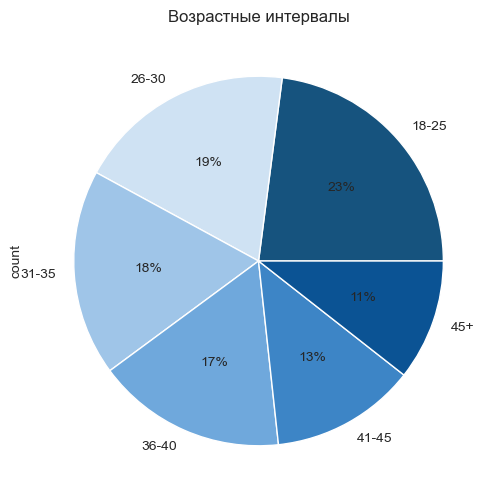

In [8]:
# ищучим возрастные диапазоны
temp = (df_raw.groupby('age_segment', as_index=False)['record_id'].agg('count')
              .sort_values(by='record_id', ascending=False)
              .rename(columns={'record_id' : 'count'}))

# отобразим распределение по долям на круговой диаграмме
sns.set_style('dark')
custom_palette = ['#16537e', '#cfe2f3', '#9fc5e8', '#6fa8dc', '#3d85c6', '#0b5394', '#073763', '#62a7d7',
                 '#9dbbd5', '#7b95ac', '#697c8c', '#b1d5f5', '#246cac', '#204e77', '#76a5af']
sns.set_palette(custom_palette)
temp.plot(y='count',
            kind='pie',
            labels=temp['age_segment'],
            autopct='%.0f%%',
            title='Возрастные интервалы',
            figsize=(6, 6),
            legend=False)
plt.show()

Большая часть пользователей в датафрейме находится в возрастном интервале 18-25 лет (23%). Меньше всего пользователей в вощрасте от 45 лет (11%).

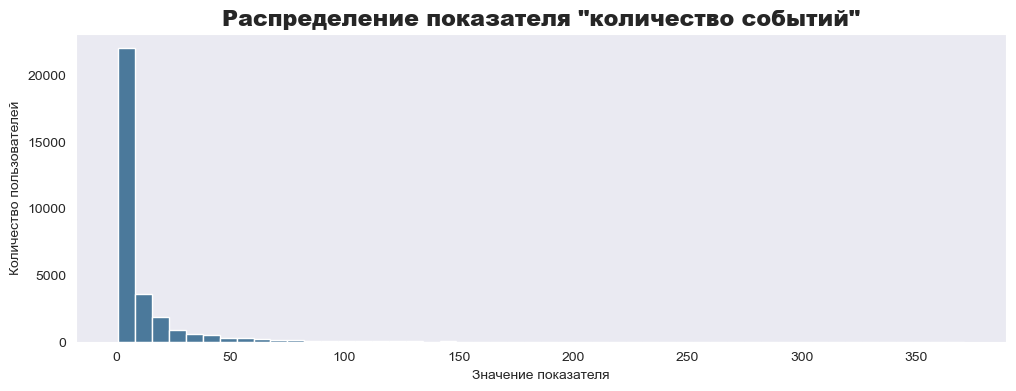

In [9]:
# изучим данные в столбце о количестве событий по гистограмме
plt.figure(figsize=(12, 4)) 
ax = sns.histplot(df_raw['visits'], bins=50)
ax.set_title('Распределение показателя "количество событий"', size=16, weight= 900)
ax.set_ylabel('Количество пользователей')
ax.set_xlabel('Значение показателя')
plt.show()

По графику можно сделать вывод, что макимальное значение скорее всего выброс. Так как основная доля событий находится в диапазоне от 1 до 50, то не будем удалять данное значение.
\
\
В целом, датасет готов к анализу и построению дашборда.

---
<a id='export'></a> 
## Экспорт данных в csv 
[Назад к оглавлению](#contens)

In [10]:
# выгрузим данные из таблицы df_raw в файл dash_visits.csv
df_raw.to_csv('dash_visits.csv', index=False)

---
<a id='dashboard'></a> 
## Дашборд
[Назад к оглавлению](#contens)

Ссылка для просмотра дашборда: https://public.tableau.com/views/__16876349266850/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

---
<a id='presentation'></a> 
## Презентация 
[Назад к оглавлению](#contens)


Ссылка для просмотра презентации: https://drive.google.com/file/d/1SW5qx3YUhXm2Ejg37wQzHVnkmpVVfumT/view?usp=drive_link